# Pima Indian Diabetes

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("dataset\pima-indians-diabetes.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(
    df.iloc[:,:-1].values, df.iloc[:,-1].values, 
    stratify=df.iloc[:,-1].values,random_state=2021)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [4]:
import tensorflow as tf 

# 할 때마다 동일한 결과를 얻기 위한 작업 
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

모델 정의 / 설정 / 학습/ 평가  
- 12 / 8 / 1 layer, 200epochs

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
model = Sequential([
    Dense(12,input_dim=8,activation='relu'),
    Dense(8,activation='relu'),
    Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [8]:
history = model.fit(X_train,y_train,validation_split=0.2,epochs=200,batch_size=50,verbose=0)

In [9]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 997us/step - loss: 0.5690 - accuracy: 0.7448


[0.5690341591835022, 0.7447916865348816]

In [10]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

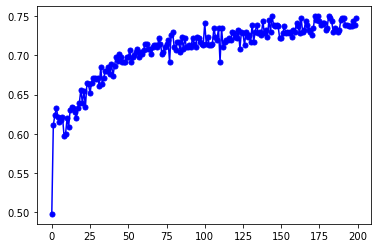

In [12]:
x_len = np.arange(len(accuracy))

plt.plot(x_len, accuracy, 'bo-',markersize=5, label='accuracy')
plt.show()

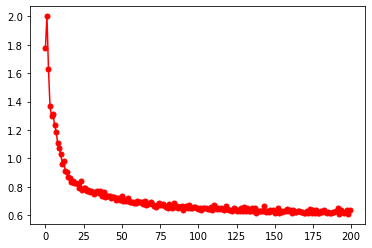

In [13]:
x_len = np.arange(len(accuracy))
plt.plot(x_len, val_loss, 'ro-',markersize=5, label='val_loss')
plt.show()

- 30 / 1 , rmsprop, 100 epochs

In [14]:
model2 = Sequential([
    Dense(30,input_dim=8,activation='relu'),
    Dense(1,activation='sigmoid')
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [15]:
model2.compile(
    loss = 'binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [16]:
history2 = model2.fit(X_train,y_train,validation_split=0.2,epochs=100,batch_size=50,verbose=0)

In [17]:
model2.evaluate(X_test,y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.7539 - accuracy: 0.6927


[0.7539340853691101, 0.6927083134651184]

- 24 / 12 / 8 / 1, 200 epochs

In [18]:
model3 = Sequential([
    Dense(24,input_dim=8,activation='relu'),
    Dense(12,activation='relu'),
    Dense(8,activation='relu'),
    Dense(1,activation='sigmoid')
])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 24)                216       
_________________________________________________________________
dense_6 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 629
Trainable params: 629
Non-trainable params: 0
_________________________________________________________________


In [19]:
model3.compile(
    loss = 'binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [20]:
history3= model3.fit(X_train,y_train,validation_split=0.2,epochs=200,batch_size=50,verbose=2)

0.4138
Epoch 2/200
10/10 - 0s - loss: 6.6367 - accuracy: 0.3348 - val_loss: 3.7411 - val_accuracy: 0.4224
Epoch 3/200
10/10 - 0s - loss: 3.2617 - accuracy: 0.3457 - val_loss: 1.6477 - val_accuracy: 0.4224
Epoch 4/200
10/10 - 0s - loss: 1.5858 - accuracy: 0.4087 - val_loss: 1.1279 - val_accuracy: 0.4569
Epoch 5/200
10/10 - 0s - loss: 1.0471 - accuracy: 0.5435 - val_loss: 0.9885 - val_accuracy: 0.5603
Epoch 6/200
10/10 - 0s - loss: 0.8512 - accuracy: 0.6348 - val_loss: 0.7958 - val_accuracy: 0.5345
Epoch 7/200
10/10 - 0s - loss: 0.7630 - accuracy: 0.6152 - val_loss: 0.7620 - val_accuracy: 0.5259
Epoch 8/200
10/10 - 0s - loss: 0.7297 - accuracy: 0.6174 - val_loss: 0.7272 - val_accuracy: 0.5690
Epoch 9/200
10/10 - 0s - loss: 0.7092 - accuracy: 0.6217 - val_loss: 0.7099 - val_accuracy: 0.5948
Epoch 10/200
10/10 - 0s - loss: 0.6967 - accuracy: 0.6457 - val_loss: 0.7150 - val_accuracy: 0.5776
Epoch 11/200
10/10 - 0s - loss: 0.6894 - accuracy: 0.6652 - val_loss: 0.7322 - val_accuracy: 0.5948
E

In [21]:
model3.evaluate(X_test,y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.5563 - accuracy: 0.7448


[0.5562655329704285, 0.7447916865348816]

Min-Max Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df.iloc[:,:-1].values)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df.iloc[:,-1].values,
stratify=df.iloc[:,-1].values,random_state=2021)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [24]:
model4 = Sequential()
model4.add(Dense(12,input_dim=8,activation='relu'))
model4.add(Dense(8,activation='relu'))
model4.add(Dense(4,activation='relu'))
model4.add(Dense(1,activation='sigmoid'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


In [25]:
model4.compile(
    loss = 'binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [26]:
history4= model4.fit(X_train,y_train,validation_split=0.2,epochs=200,batch_size=50,verbose=2)

0.6034
Epoch 2/200
10/10 - 0s - loss: 0.6766 - accuracy: 0.6674 - val_loss: 0.6938 - val_accuracy: 0.5862
Epoch 3/200
10/10 - 0s - loss: 0.6698 - accuracy: 0.6674 - val_loss: 0.6936 - val_accuracy: 0.5862
Epoch 4/200
10/10 - 0s - loss: 0.6661 - accuracy: 0.6674 - val_loss: 0.6943 - val_accuracy: 0.5862
Epoch 5/200
10/10 - 0s - loss: 0.6624 - accuracy: 0.6674 - val_loss: 0.6949 - val_accuracy: 0.5862
Epoch 6/200
10/10 - 0s - loss: 0.6604 - accuracy: 0.6674 - val_loss: 0.6954 - val_accuracy: 0.5862
Epoch 7/200
10/10 - 0s - loss: 0.6583 - accuracy: 0.6674 - val_loss: 0.6952 - val_accuracy: 0.5862
Epoch 8/200
10/10 - 0s - loss: 0.6570 - accuracy: 0.6674 - val_loss: 0.6958 - val_accuracy: 0.5862
Epoch 9/200
10/10 - 0s - loss: 0.6552 - accuracy: 0.6674 - val_loss: 0.6958 - val_accuracy: 0.5862
Epoch 10/200
10/10 - 0s - loss: 0.6538 - accuracy: 0.6674 - val_loss: 0.6957 - val_accuracy: 0.5862
Epoch 11/200
10/10 - 0s - loss: 0.6528 - accuracy: 0.6674 - val_loss: 0.6973 - val_accuracy: 0.5862
E

In [27]:
model4.evaluate(X_test,y_test)

6/6 [==============================] - 0s 997us/step - loss: 0.4875 - accuracy: 0.7604


[0.4874926507472992, 0.7604166865348816]

* 시각화

In [29]:
y_acc = history4.history['accuracy']
y_vloss = history4.history['val_loss']

x_len = np.arange(len(y_acc))

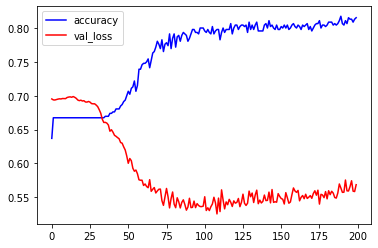

In [32]:
plt.plot(x_len, y_acc, 'b-',markersize=5, label='accuracy')
plt.plot(x_len, y_vloss, 'r-',markersize=5, label='val_loss')
plt.legend()
plt.show()